In [1]:
# Importing relevant Python librarires
import pandas as pd
import numpy as np
import matplotlib as bplt

In [2]:
# Reading the data file
listings = pd.read_csv('listings.csv')

In [3]:
# Data Cleaning by Removing duplicated rows and non relevant columns
listings_clean = listings.drop_duplicates().drop(columns = ['listing_url','scrape_id','last_scraped','source','description',
                                          'neighborhood_overview','picture_url','host_url','host_since','host_location',
                                          'host_about','host_response_time','host_response_rate','host_acceptance_rate',
                                          'host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood',
                                          'host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic',
                                          'neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude',
                                          'bathrooms','bathrooms_text','minimum_nights','maximum_nights','minimum_minimum_nights',
                                          'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
                                          'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
                                          'availability_30','availability_60','availability_90','calendar_last_scraped',
                                          'number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d',
                                          'first_review','last_review','review_scores_rating','review_scores_accuracy',
                                          'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                                          'review_scores_location','review_scores_value','license','instant_bookable',
                                          'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                                          'calculated_host_listings_count_private_rooms',
                                          'calculated_host_listings_count_shared_rooms','reviews_per_month'])

In [4]:
# Data Cleaning contiuation by Missing values handling
listings_clean_missing_values = listings_clean.dropna()

In [5]:
# Fitering out properties which are not located in Washington, United States according to the 'neighbourhood' field 
listings_clean_missing_values_Washington = listings_clean_missing_values[listings_clean_missing_values['neighbourhood'].str.contains("Washington")]

In [6]:
# Creating a column for the KPI calculation
listings_clean_missing_values_Washington['price'] = listings_clean_missing_values_Washington['price'].replace('\$', '', regex=True).replace('\,', '', regex=True).astype(float)
listings_clean_missing_values_Washington["forecasted_revenue"] = (listings_clean_missing_values_Washington["price"]*(365-listings_clean_missing_values_Washington["availability_365"]))

C:\Users\Shir Vultz\AppData\Local\Temp\ipykernel_22680\2625639630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_clean_missing_values_Washington['price'] = listings_clean_missing_values_Washington['price'].replace('\$', '', regex=True).replace('\,', '', regex=True).astype(float)
C:\Users\Shir Vultz\AppData\Local\Temp\ipykernel_22680\2625639630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_clean_missing_values_Washington["forecasted_revenue"] = (listings_clean_missing_values_Wash

In [7]:
# Statistical data of the Forecasted Revenue of the coming year Airbnb properties in Washington, United States (The KPI)
listings_clean_missing_values_Washington["forecasted_revenue"].describe()

count    3.738000e+03
mean     4.325087e+04
std      6.356976e+04
min      0.000000e+00
25%      1.453950e+04
50%      3.454900e+04
75%      5.592725e+04
max      2.190000e+06
Name: forecasted_revenue, dtype: float64

In [8]:
# Filtering coming year Forecasted Revenue Top 25% (Q1) Airbnb properties in Washington, United States  
listings_clean_missing_values_Washington_Q1 = listings_clean_missing_values_Washington.query('forecasted_revenue >= 5.592725e+04')

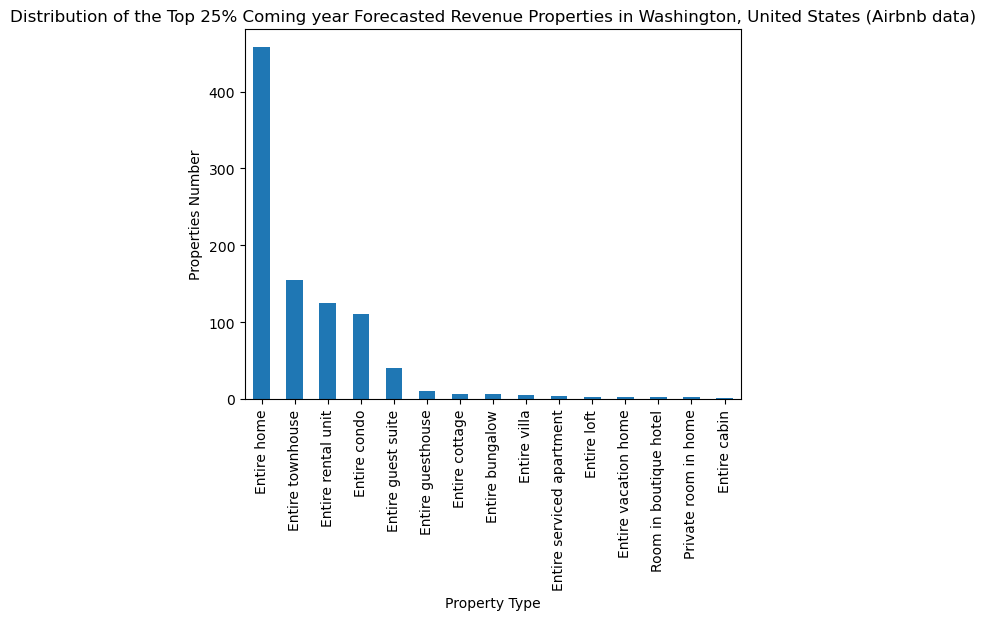

In [9]:
# Coming year Forecasted Revenue Top 25% (Q1) Airbnb properties in Washington, United States - Property Type Distribution
listings_clean_missing_values_Washington_Q1_count = listings_clean_missing_values_Washington_Q1['property_type'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the Top 25% Coming year Forecasted Revenue Properties in Washington, United States (Airbnb data)' , xlabel = 'Property Type', ylabel = 'Properties Number')

In [10]:
# Further Filtering by Neighbourhood The filtered by Property Type the coming year Forecasted Revenue Top 25% Airbnb properties in Washington, United States
listings_clean_missing_values_Washington_Q1_Entire_home = listings_clean_missing_values_Washington_Q1[listings_clean_missing_values_Washington_Q1['property_type'].str.contains("Entire home")]

In [11]:
# Analyzing the above in order to evaluate the Neighborhoods distribution
listings_clean_missing_values_Washington_Q1_Entire_home['neighbourhood'].describe()

count                                    458
unique                                     1
top       Seattle, Washington, United States
freq                                     458
Name: neighbourhood, dtype: object

In [12]:
# It seems that the above filtered data relate to properties located only in Seattle, so no need for 'neighbourhood' filtration
# Analyzing the above in order to evaluate the Room Type distribution
listings_clean_missing_values_Washington_Q1_Entire_home['room_type'].describe()

count                 458
unique                  1
top       Entire home/apt
freq                  458
Name: room_type, dtype: object

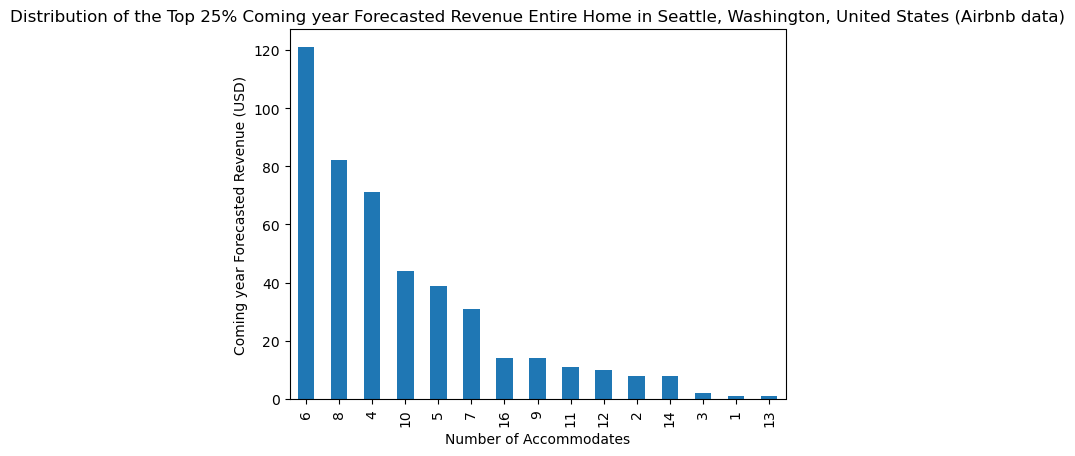

In [13]:
# It seems that the above filtered data relate to only Entire home/apt properties type, so no need for 'room_type' filtration
# Analyzing the above in order to evaluate the Accommodates distribution
listings_clean_missing_values_Washington_Q1_Entire_home.count = listings_clean_missing_values_Washington_Q1_Entire_home['accommodates'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the Top 25% Coming year Forecasted Revenue Entire Home in Seattle, Washington, United States (Airbnb data)' , xlabel = 'Number of Accommodates', ylabel = 'Coming year Forecasted Revenue (USD)')

In [14]:
# Conclusion: 
# The properties with the highest Forecasted Revenue in Washington, United States in the coming year, according to Airbnb
# data are Entire Home type, with Entire Home / Apartment room type, located in Seattle, and which are suitable to 
# accommodate 6 people.